In [41]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [42]:
data_good = pd.read_csv('data/danrer11_good.csv',index_col=0)
data_bad = pd.read_csv('data/danrer11_bad.csv',index_col=0)
data_good_bad = pd.read_csv('data/danrer11_good_bad.csv',index_col=0)

In [43]:
data_good

,GUIDE,Efficiency
Rank,,
1,CGATGTTGGGAAACTTGGGTAGG,70.94
13,TCCTGAATGTGTATGAGTCGAGG,67.71
17,AAGACGCGTTAAACGCTCAGCGG,72.91
1,CTAAACGAGATGAATTACCGTGG,75.01
2,TAATGACGTGAACGCGCCCGTGG,68.97
...,...,...
10,TTGTACTTCCGGCTTCAATGAGG,67.26
1,CAATAAGAAAGCCTAATCGTCGG,68.67
7,ACACAACAGCGCCATCTCAGTGG,68.37


In [44]:
data_bad

,GUIDE,Efficiency
Rank,,
26,TCTTTATGATCTTGTGTTTACGG,18.46
16,TTAGATGCGCGTGCTCTAATTGG,31.92
20,TCACTTGACAGGAGGTTTATCGG,29.22
29,TTCCAACTGTCTCAAGTATTTGG,24.10
29,AGAGGAAGCCGGTGCGGATCTGG,32.00
...,...,...
12,ACGAGTAGTCATGGCTAGTTTGG,32.21
21,TTCAATATCATCTGTTATTTTGG,10.67
6,GATCAGCGCCTCCTGTGTTCTGG,30.54


# Transform Data

## One-hot encoding

In [45]:
encoding = {'A':np.array([1,0,0,0]),
            'C':np.array([0,1,0,0]),
            'G':np.array([0,0,1,0]),
            'T':np.array([0,0,0,1])}

def one_hot(guide,encoding):
    data = np.zeros((4,len(guide)))
    assert data.shape == (4,23)
    for i in range(data.shape[-1]):
        data[:,i] = encoding[guide[i]]
    return data

#print(one_hot('CTGATCACGGCTGAAGGACTCGG',encoding))

def batch_one_hot(data,encoding):
    guides = np.zeros((len(data),4,23))
    i=0
    for guide in data['GUIDE']:
        guides[i] = one_hot(guide,encoding)
        i+=1
    return guides

guides_good = batch_one_hot(data_good,encoding)
guides_bad = batch_one_hot(data_bad,encoding)
guides_good_bad = batch_one_hot(data_good_bad,encoding)
print('Good dataset size:',guides_good.shape)
print('Bad dataset size:',guides_bad.shape)
print('All dataset size:',guides_good_bad.shape)

Good dataset size: (6501, 4, 23)
Bad dataset size: (7582, 4, 23)
All dataset size: (14083, 4, 23)


# Observe statistics of GUIDE

## Good

In [46]:
eps = np.finfo(guides_good_bad.dtype).eps
distribution = guides_good_bad.sum(axis = 0)

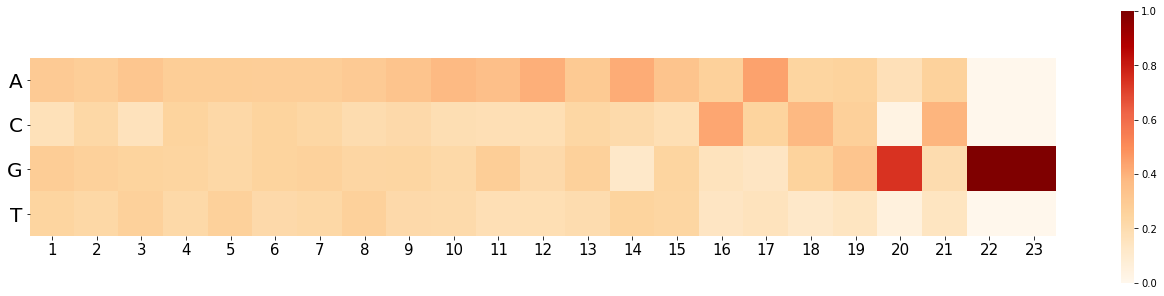

In [93]:
input_matrix = guides_good.sum(axis = 0)
plt.figure(figsize=(23,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
sns.heatmap((input_matrix)/input_matrix.sum(axis = 0),
            cmap="OrRd",
            xticklabels=range(1,23+1),
            yticklabels=encoding.keys(),square = True)
plt.yticks(rotation=360)
plt.savefig("good_normal.png")

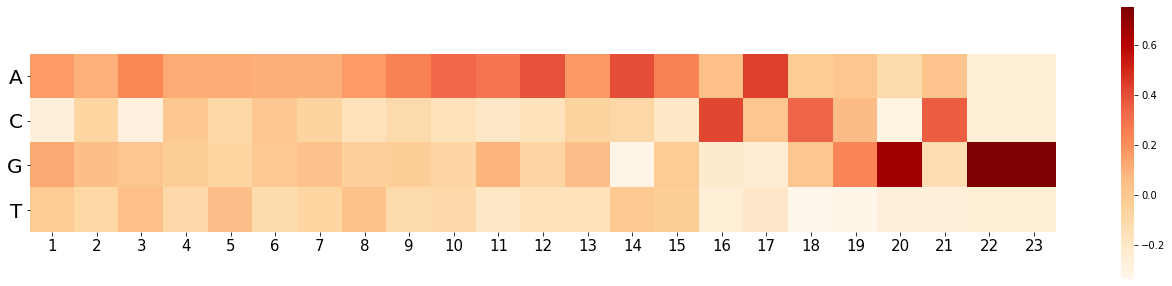

In [97]:
input_matrix = guides_good.sum(axis = 0)
plt.figure(figsize=(23,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
sns.heatmap((input_matrix-input_matrix.mean(axis = 0))/input_matrix.max(axis = 0),
            cmap="OrRd",
            xticklabels=range(1,23+1),
            yticklabels=encoding.keys(),square = True)
plt.yticks(rotation=360)
plt.savefig("good_view.png")

## Bad

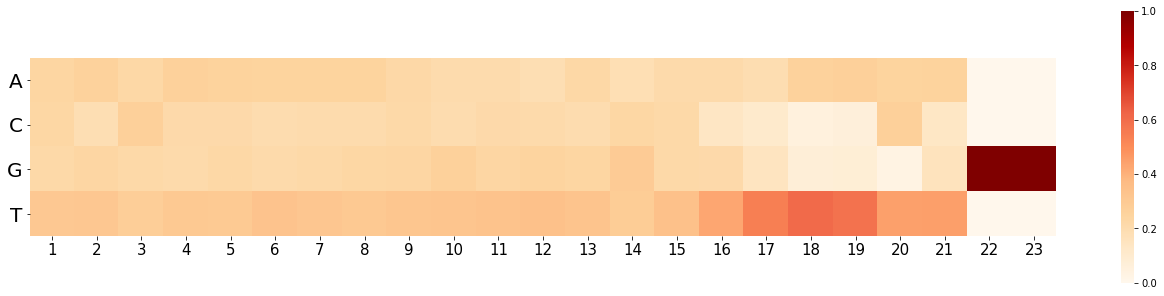

In [95]:
input_matrix = guides_bad.sum(axis = 0)
plt.figure(figsize=(23,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
sns.heatmap((input_matrix)/input_matrix.sum(axis = 0),
            cmap="OrRd",
            xticklabels=range(1,23+1),
            yticklabels=encoding.keys(),square = True)
plt.yticks(rotation=360)
plt.savefig("bad_normal.png")

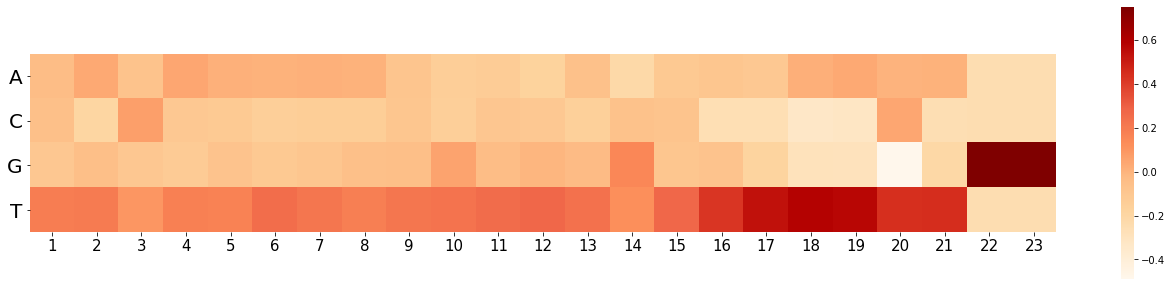

In [98]:
input_matrix = guides_bad.sum(axis = 0)
plt.figure(figsize=(23,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
sns.heatmap((input_matrix-input_matrix.mean(axis = 0))/input_matrix.max(axis = 0),
            cmap="OrRd",
            xticklabels=range(1,23+1),
            yticklabels=encoding.keys(),square = True)
plt.yticks(rotation=360)
plt.savefig("bad_view.png")